<a href="https://colab.research.google.com/github/waghvaishnav/Deep-Learning-PlayGround-Hub/blob/main/Batch_Mini_Batch_Stochastic_Gradient_Descent_in_Deep_Learning(PyTorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving bonus_dataset.csv to bonus_dataset (3).csv


{'bonus_dataset (3).csv': b'employee_id,performance,years_of_experience,projects_completed,bonus\r\nEMP_001,7,2,4,124\r\nEMP_002,4,1,4,82\r\nEMP_003,8,7,10,178\r\nEMP_004,5,7,8,138\r\nEMP_005,7,8,9,170\r\nEMP_006,10,5,8,186\r\nEMP_007,3,3,5,84\r\nEMP_008,7,8,9,170\r\nEMP_009,8,6,9,170\r\nEMP_010,5,3,6,110\r\nEMP_011,4,1,4,82\r\nEMP_012,8,3,5,144\r\nEMP_013,8,5,8,162\r\nEMP_014,3,3,6,86\r\nEMP_015,6,1,4,106\r\nEMP_016,5,5,8,126\r\nEMP_017,2,10,11,126\r\nEMP_018,8,7,8,174\r\nEMP_019,6,7,10,154\r\nEMP_020,2,9,11,120\r\nEMP_021,5,10,11,162\r\nEMP_022,1,10,13,118\r\nEMP_023,10,3,4,166\r\nEMP_024,6,7,8,150\r\nEMP_025,9,1,3,140\r\nEMP_026,1,4,7,70\r\nEMP_027,10,4,7,178\r\nEMP_028,3,5,7,100\r\nEMP_029,7,7,9,164\r\nEMP_030,4,7,10,130\r\nEMP_031,9,4,7,166\r\nEMP_032,3,7,9,116\r\nEMP_033,5,3,4,106\r\nEMP_034,3,6,7,106\r\nEMP_035,7,2,4,124\r\nEMP_036,5,10,11,162\r\nEMP_037,9,9,11,204\r\nEMP_038,7,5,6,146\r\nEMP_039,2,6,7,94\r\nEMP_040,4,4,7,106\r\nEMP_041,9,10,13,214\r\nEMP_042,2,7,8,102\r\nEMP_04

In [ ]:
import pandas as pd
import torch

data = pd.read_csv("bonus_dataset.csv")
df = pd.DataFrame(data)

df.head(3)

,employee_id,performance,years_of_experience,projects_completed,bonus
0,EMP_001,7,2,4,124
1,EMP_002,4,1,4,82
2,EMP_003,8,7,10,178


## Batch Gradient Descent

In [ ]:
performance = torch.tensor(df['performance'].values,dtype=torch.float32)
years_of_experience = torch.tensor(df['years_of_experience'].values,dtype=torch.float32)
projects_completed = torch.tensor(df['projects_completed'].values,dtype=torch.float32)
bonus = torch.tensor(df['bonus'].values,dtype=torch.float32)

# initializes the weights randomly
w1 = torch.rand(1,requires_grad=True)
w2 = torch.rand(1,requires_grad=True)
w3 = torch.rand(1,requires_grad=True)

# calculate the bias
bias = torch.rand(1,requires_grad=True)

w1,w2,w3,bias

(tensor([0.5939], requires_grad=True),
 tensor([0.9003], requires_grad=True),
 tensor([0.1054], requires_grad=True),
 tensor([0.7164], requires_grad=True))

In [ ]:
# set the epochs

epochs = 5000

# set the learning rate

learning_rate = 0.005

loss_history = []
for epoch in range(epochs):
  # make prediction
  predicted_bonus = (w1*performance + w2*years_of_experience + w3*projects_completed + bias)

  # calculating loss (mean squared error)
  loss = ((bonus - predicted_bonus)**2).mean()
  loss_history.append(loss.item())
  # apply the backpropagation
  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    w3 -= learning_rate * w3.grad
    bias -= learning_rate * bias.grad

  w1.grad.zero_()          # here we zeros to gradients due to accumulation and adds the new grad into them.
  w2.grad.zero_()
  w3.grad.zero_()
  bias.grad.zero_()

  if epoch % 100 == 0:
    print(f"epoch {epoch} , loss {loss.item():0.2f} ")


# for the better result we can adjust the epochs and learning rate.

epoch 0 , loss 17370.53 
epoch 100 , loss 17.46 
epoch 200 , loss 15.57 
epoch 300 , loss 13.89 
epoch 400 , loss 12.40 
epoch 500 , loss 11.07 
epoch 600 , loss 9.88 
epoch 700 , loss 8.82 
epoch 800 , loss 7.88 
epoch 900 , loss 7.03 
epoch 1000 , loss 6.28 
epoch 1100 , loss 5.60 
epoch 1200 , loss 5.00 
epoch 1300 , loss 4.47 
epoch 1400 , loss 3.99 
epoch 1500 , loss 3.56 
epoch 1600 , loss 3.18 
epoch 1700 , loss 2.84 
epoch 1800 , loss 2.53 
epoch 1900 , loss 2.26 
epoch 2000 , loss 2.02 
epoch 2100 , loss 1.80 
epoch 2200 , loss 1.61 
epoch 2300 , loss 1.44 
epoch 2400 , loss 1.28 
epoch 2500 , loss 1.15 
epoch 2600 , loss 1.02 
epoch 2700 , loss 0.91 
epoch 2800 , loss 0.81 
epoch 2900 , loss 0.73 
epoch 3000 , loss 0.65 
epoch 3100 , loss 0.58 
epoch 3200 , loss 0.52 
epoch 3300 , loss 0.46 
epoch 3400 , loss 0.41 
epoch 3500 , loss 0.37 
epoch 3600 , loss 0.33 
epoch 3700 , loss 0.29 
epoch 3800 , loss 0.26 
epoch 3900 , loss 0.23 
epoch 4000 , loss 0.21 
epoch 4100 , loss 0

In [ ]:
# printing the learning weights and ther bias

w1.item(),w2.item(),w3.item(),bias.item()

(12.04715633392334, 5.838222980499268, 2.2158195972442627, 18.946199417114258)

Visualize how the loss changes in each iteration

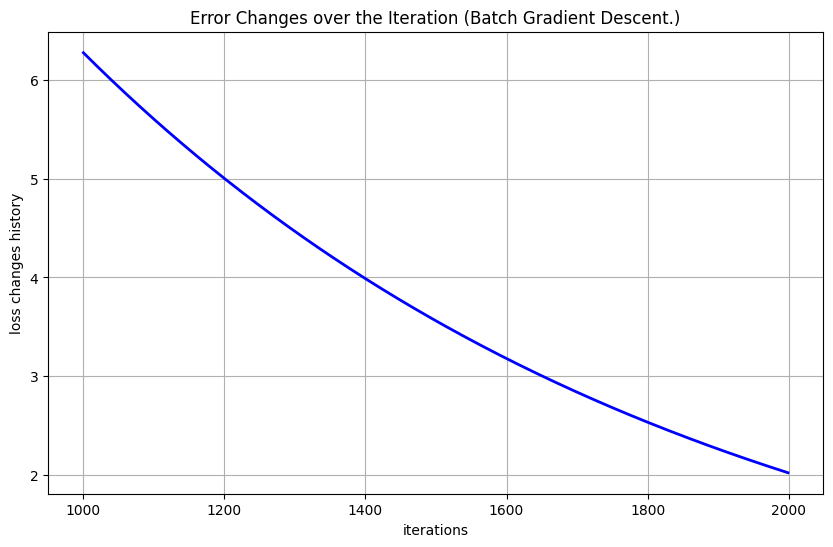

In [ ]:
import matplotlib.pyplot as plt

def plot_graph(epochs,loss_history,title):
  plt.figure(figsize=(10,6))
  plt.plot(epochs,loss_history,color="blue",linewidth=2)
  plt.title(title)
  plt.grid()
  plt.xlabel("iterations")
  plt.ylabel("loss changes history")
  plt.show()

plot_graph(range(1000,2000),loss_history[1000:2000],"Error Changes over the Iteration (Batch Gradient Descent.)")

# Mini-Batch Gradient Descent

In [ ]:
# initializes the weights randomly
w1 = torch.rand(1,requires_grad=True)
w2 = torch.rand(1,requires_grad=True)
w3 = torch.rand(1,requires_grad=True)

# calculate the bias
bias = torch.rand(1,requires_grad=True)

w1,w2,w3,bias

(tensor([0.5929], requires_grad=True),
 tensor([0.5453], requires_grad=True),
 tensor([0.5321], requires_grad=True),
 tensor([0.4628], requires_grad=True))

In [ ]:
df.head(3)

,employee_id,performance,years_of_experience,projects_completed,bonus
0,EMP_001,7,2,4,124
1,EMP_002,4,1,4,82
2,EMP_003,8,7,10,178


In [ ]:
# set the epochs

epochs = 3000

# set the learning rate

learning_rate = 0.001

n_samples = len(performance)
# define the batch size
batch_size = 16


loss_history = []
for epoch in range(epochs):
  for i in range(0,n_samples,batch_size):
    #select the mini batch:
    batch_performance = performance[i:i + batch_size]
    batch_years_of_experience = years_of_experience[i:i + batch_size]
    batch_projects_completed = projects_completed[i:i + batch_size]
    batch_bonus = bonus[i:i + batch_size]

    # make prediction
    predicted_bonus = (w1*batch_performance + w2*batch_years_of_experience + w3*batch_projects_completed + bias)

    # calculating loss (mean squared error)
    loss = ((predicted_bonus - batch_bonus)**2).mean()
    loss_history.append(loss.item())
    # apply the backpropagation
    loss.backward()

    with torch.no_grad():
      w1 -= learning_rate * w1.grad
      w2 -= learning_rate * w2.grad
      w3 -= learning_rate * w3.grad
      bias -= learning_rate * bias.grad

    w1.grad.zero_()          # here we zeros to gradients due to accumulation and adds the new grad into them.
    w2.grad.zero_()
    w3.grad.zero_()
    bias.grad.zero_()

  if epoch % 100 == 0:
      print(f"epoch {epoch} , loss {loss.item():0.2f} ")


# for the better result we can adjust the epochs and learning rate.

epoch 0 , loss 1803.16 
epoch 100 , loss 13.00 
epoch 200 , loss 10.78 
epoch 300 , loss 9.08 
epoch 400 , loss 7.70 
epoch 500 , loss 6.57 
epoch 600 , loss 5.61 
epoch 700 , loss 4.80 
epoch 800 , loss 4.11 
epoch 900 , loss 3.52 
epoch 1000 , loss 3.02 
epoch 1100 , loss 2.58 
epoch 1200 , loss 2.21 
epoch 1300 , loss 1.90 
epoch 1400 , loss 1.63 
epoch 1500 , loss 1.39 
epoch 1600 , loss 1.19 
epoch 1700 , loss 1.02 
epoch 1800 , loss 0.88 
epoch 1900 , loss 0.75 
epoch 2000 , loss 0.64 
epoch 2100 , loss 0.55 
epoch 2200 , loss 0.47 
epoch 2300 , loss 0.40 
epoch 2400 , loss 0.35 
epoch 2500 , loss 0.30 
epoch 2600 , loss 0.25 
epoch 2700 , loss 0.22 
epoch 2800 , loss 0.19 
epoch 2900 , loss 0.16 


In [ ]:
# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Learned weights: w1 = 12.0900, w2 = 5.7582, w3 = 2.3372
Learned bias: 18.1857


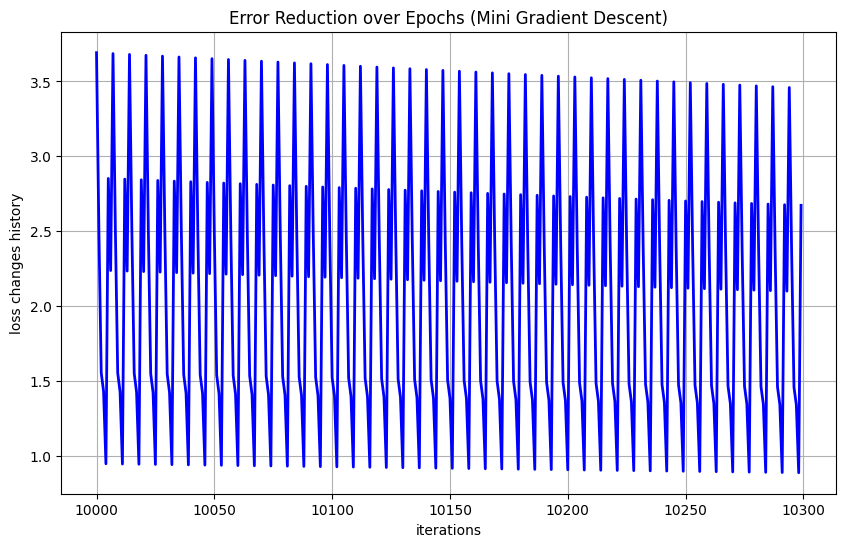

In [ ]:
plot_graph(range(10000,10300), loss_history[10000:10300], "Error Reduction over Epochs (Mini Gradient Descent)")

# Stochastic Gradient Descent

In [ ]:
# initializes the weights randomly
w1 = torch.rand(1,requires_grad=True)
w2 = torch.rand(1,requires_grad=True)
w3 = torch.rand(1,requires_grad=True)

# calculate the bias
bias = torch.rand(1,requires_grad=True)

w1,w2,w3,bias

(tensor([0.5192], requires_grad=True),
 tensor([0.3255], requires_grad=True),
 tensor([0.9602], requires_grad=True),
 tensor([0.0751], requires_grad=True))

In [ ]:
# set the epochs

epochs = 500

# set the learning rate

learning_rate = 0.001

n_samples = len(performance)


loss_history = []
for epoch in range(epochs):
  for i in range(n_samples):
    #select the single data point :
    single_performance = performance[i]
    single_years_of_experience = years_of_experience[i]
    single_projects_completed = projects_completed[i]
    single_bonus = bonus[i]

    # make prediction
    predicted_bonus = (w1*single_performance + w2*single_years_of_experience + w3*single_projects_completed + bias)

    # calculating loss (mean squared error)
    loss = ((predicted_bonus - single_bonus)**2).mean()

    if i % 10 == 0:
      loss_history.append(loss.item())
    # apply the backpropagation
    loss.backward()

    with torch.no_grad():
      w1 -= learning_rate * w1.grad
      w2 -= learning_rate * w2.grad
      w3 -= learning_rate * w3.grad
      bias -= learning_rate * bias.grad

    w1.grad.zero_()          # here we zeros to gradients due to accumulation and adds the new grad into them.
    w2.grad.zero_()
    w3.grad.zero_()
    bias.grad.zero_()

  if epoch % 100 == 0:
      print(f"epoch {epoch} , loss {loss.item():0.2f} ")


# for the better result we can adjust the epochs and learning rate.

epoch 0 , loss 7.23 
epoch 100 , loss 0.70 
epoch 200 , loss 0.06 
epoch 300 , loss 0.01 
epoch 400 , loss 0.00 


In [ ]:
# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Learned weights: w1 = 12.0023, w2 = 5.9930, w3 = 2.0090
Learned bias: 19.9562


In [ ]:
len(loss_history)

5000

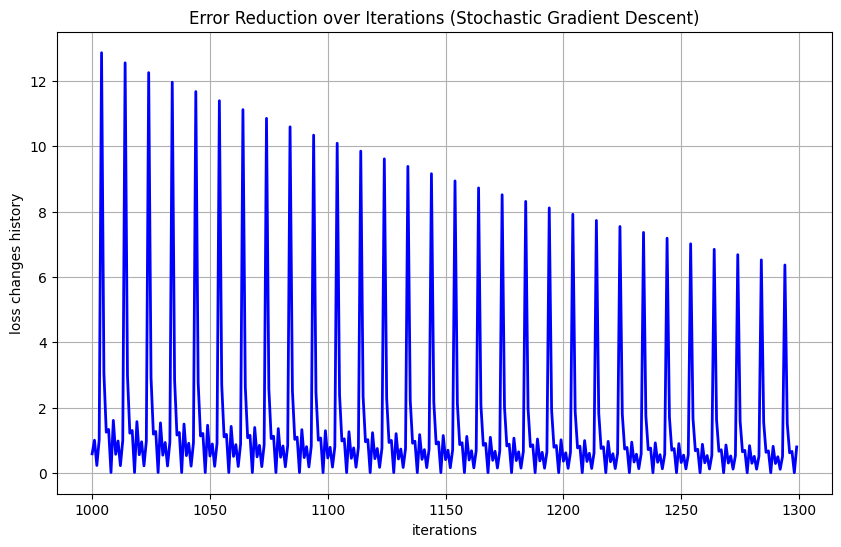

In [ ]:
plot_graph(range(1000,1300), loss_history[1000:1300], "Error Reduction over Iterations (Stochastic Gradient Descent)")